In [1]:
import os
import numpy as np
from pathlib import Path

folder_path = os.path.join(os.getcwd(), 'validation_boxes/imgs/')
print(os.path.exists(folder_path))

True


In [2]:
files = os.listdir(folder_path)
print(len(files))

3076


In [3]:
first_file_path = os.path.join(folder_path, files[0])
print(first_file_path)

/Users/sophiastiles/Custom/Research/validation_boxes/imgs/2DBox_CT_0929.npz


In [4]:
import numpy as np
data  = np.load(first_file_path)
print(type(data))
print(list(data.keys()))
img = data['imgs']
boxes = data['boxes']

print(img.shape)
print(boxes.shape)

<class 'numpy.lib.npyio.NpzFile'>
['imgs', 'boxes']
(512, 512, 3)
(3, 4)


[[ 77 118 261 349]
 [283 141 434 364]
 [215 133 402 270]]


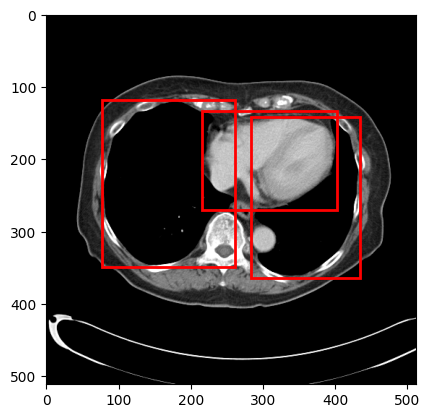

In [5]:
print(boxes)
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# Loop through the bounding boxes and add them to the plot
fig, ax = plt.subplots(1)
ax.imshow(img)
for box in boxes:
    # Box should have shape (4,), extract coordinates
    x1, y1, x2, y2 = box
    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()


In [6]:
gt_path = os.path.join(os.getcwd(), 'validation_boxes/gts/')
print(os.path.exists(gt_path))
gt_files = os.listdir(gt_path)
print(len(gt_files))
first_gt_file_path = os.path.join(gt_path, gt_files[0])
print(first_gt_file_path)

True
3278
/Users/sophiastiles/Custom/Research/validation_boxes/gts/2DBox_CT_0929.npz


In [7]:
gt_data  = np.load(first_gt_file_path)
print(type(gt_data))
print(list(gt_data.keys()))
gts = gt_data['gts']
print(type(gts))
print(gts.shape)
print(gts)
# get unique values from gts ndarray
print(np.unique(gts))

<class 'numpy.lib.npyio.NpzFile'>
['gts']
<class 'numpy.ndarray'>
(512, 512)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 2 3]


In [ ]:
arr = gts
copies = []
for _ in np.unique(arr)[1:]:
    binary = np.where(arr != 0, 1, 0)  # 1 where value == i, else 0
    copies.append(binary)

# `copies` is a list of 3 arrays, each of shape (512,)
# Optionally, stack into a 2D array
three_masks = np.stack(copies)  # shape: (3, 512)
print(three_masks.shape)


(3, 512, 512)


In [32]:
for m in three_masks:
    print(m.shape)
    print(np.unique(m))

(512, 512)
[0 1]
(512, 512)
[0 1]
(512, 512)
[0 1]


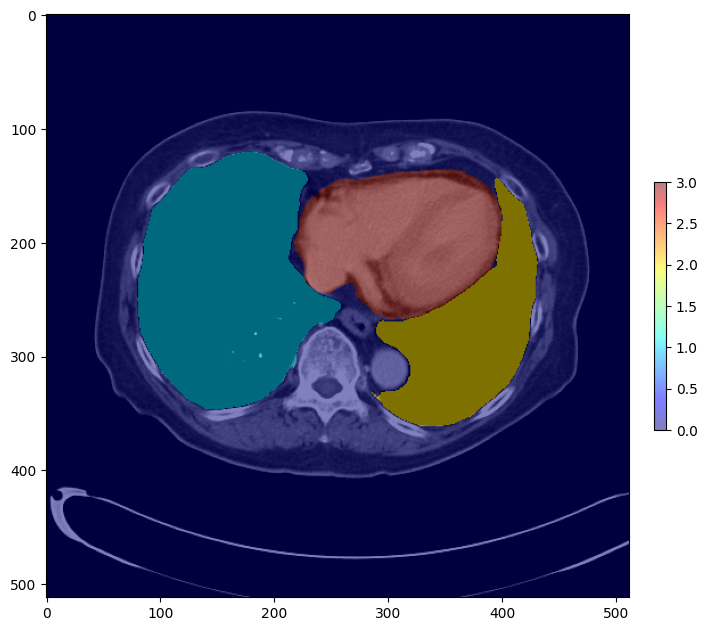

In [8]:
# Step 1: Plot the image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)  # Plot the image first

# Step 2: Overlay the mask using imshow
# Using the 'jet' colormap for the mask, with some transparency (alpha blending)
mask_overlay = ax.imshow(gts, cmap='jet', alpha=0.5)

# Step 3: Add a colorbar to show the mask color mapping
plt.colorbar(mask_overlay, ax=ax, fraction=0.02, pad=0.04)

# Step 4: Show the result
plt.show()

In [9]:
# Define the paths to the two folders
folder_img_bbox = folder_path
folder_gt_masks = gt_path

diff = abs(len(os.listdir(folder_img_bbox)) - len(os.listdir(folder_gt_masks)))
print(diff)

# Get the list of filenames in both folders
img_bbox_files = sorted(os.listdir(folder_img_bbox))
gt_mask_files = sorted(os.listdir(folder_gt_masks))

img_bbox_files = set(img_bbox_files[:diff])
gt_mask_files = set(gt_mask_files[:diff])

# Find the mismatches
missing_in_bbox = gt_mask_files - img_bbox_files
missing_in_gt = img_bbox_files - gt_mask_files

# Output the results
print("Num files in GT masks but not in image-bbox folder:")
print(len(missing_in_bbox))
for file in missing_in_bbox:
    print(file)

print("\nFiles in image-bbox folder but not in GT masks folder:")
print(len(missing_in_gt))
for file in missing_in_gt:
    print(file)


202
Num files in GT masks but not in image-bbox folder:
0

Files in image-bbox folder but not in GT masks folder:
0


In [10]:
file_names = os.listdir(folder_path)

# Print the list of file names
for f in sorted(file_names):
    print(f)

2DBox_CT_0001.npz
2DBox_CT_0002.npz
2DBox_CT_0003.npz
2DBox_CT_0004.npz
2DBox_CT_0005.npz
2DBox_CT_0006.npz
2DBox_CT_0007.npz
2DBox_CT_0009.npz
2DBox_CT_0012.npz
2DBox_CT_0013.npz
2DBox_CT_0015.npz
2DBox_CT_0016.npz
2DBox_CT_0017.npz
2DBox_CT_0018.npz
2DBox_CT_0019.npz
2DBox_CT_0020.npz
2DBox_CT_0021.npz
2DBox_CT_0022.npz
2DBox_CT_0023.npz
2DBox_CT_0024.npz
2DBox_CT_0025.npz
2DBox_CT_0026.npz
2DBox_CT_0028.npz
2DBox_CT_0029.npz
2DBox_CT_0030.npz
2DBox_CT_0031.npz
2DBox_CT_0032.npz
2DBox_CT_0033.npz
2DBox_CT_0034.npz
2DBox_CT_0035.npz
2DBox_CT_0036.npz
2DBox_CT_0037.npz
2DBox_CT_0038.npz
2DBox_CT_0040.npz
2DBox_CT_0041.npz
2DBox_CT_0043.npz
2DBox_CT_0044.npz
2DBox_CT_0045.npz
2DBox_CT_0046.npz
2DBox_CT_0047.npz
2DBox_CT_0048.npz
2DBox_CT_0049.npz
2DBox_CT_0051.npz
2DBox_CT_0052.npz
2DBox_CT_0053.npz
2DBox_CT_0054.npz
2DBox_CT_0055.npz
2DBox_CT_0056.npz
2DBox_CT_0057.npz
2DBox_CT_0058.npz
2DBox_CT_0059.npz
2DBox_CT_0060.npz
2DBox_CT_0061.npz
2DBox_CT_0062.npz
2DBox_CT_0063.npz
2DBox_CT_0